# Arboles y Bosques Aleatorios

### Libreta Oficial

In [1]:
# Importamos las liberias necesarias
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
# Estilo plotting en R
plt.style.use('ggplot')

In [3]:
mainpath="D:/UNICAH/IA"
filename="census.csv"
fullpath=os.path.join(mainpath, filename)

In [4]:
data=pd.read_csv(fullpath)

In [5]:
data.head()

age          workclass   education  education_num       marital_status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race   gender  hours_per_week  \
0        Adm-clerical   Not-in-family   White     Male              40   
1     Exec-managerial         Husband   White     Male              13   
2   Handlers-cleaners   Not-in-family   White     Male              40   
3   Handlers-cleaners         Husband   Black     Male              40   
4      Prof-specialty            Wife   Black   Female              40   

   native_country  greater_than_50k  
0   United-States                 0  
1   United-States                 0  
2   United-States                 0  
3   United-States                 0  
4            Cuba                 0

In [6]:
data.count(0)/data.shape[0]*100

age                 100.000000
workclass            94.361179
education           100.000000
education_num       100.000000
marital_status      100.000000
occupation           94.339681
relationship        100.000000
race                100.000000
gender              100.000000
hours_per_week      100.000000
native_country       98.209459
greater_than_50k    100.000000
dtype: float64

In [7]:
# Eliminamos esta columna ya que como podemos observar existe dos identicas y pueden generar conflico
# al momento de hacer la clasificacion
del data['education_num']

In [8]:
# Mostramos los valores que son verdaderos que si ganas 50K
data[data.greater_than_50k==1].head()

age          workclass      education       marital_status  \
7    52   Self-emp-not-inc        HS-grad   Married-civ-spouse   
8    31            Private        Masters        Never-married   
9    42            Private      Bachelors   Married-civ-spouse   
10   37            Private   Some-college   Married-civ-spouse   
11   30          State-gov      Bachelors   Married-civ-spouse   

          occupation    relationship                 race   gender  \
7    Exec-managerial         Husband                White     Male   
8     Prof-specialty   Not-in-family                White   Female   
9    Exec-managerial         Husband                White     Male   
10   Exec-managerial         Husband                Black     Male   
11    Prof-specialty         Husband   Asian-Pac-Islander     Male   

    hours_per_week  native_country  greater_than_50k  
7               45   United-States                 1  
8               50   United-States                 1  
9               40   United-States                 1  
10              80   United-States                 1  
11              40           India                 1

Text(0, 0.5, 'Frecuencia')

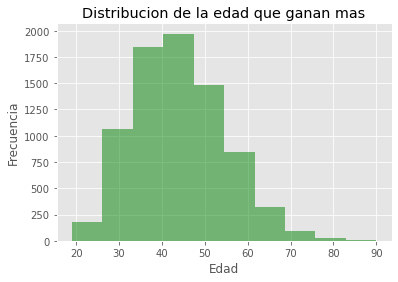

In [9]:
# Histograma que compara la edad y donde se centra las edades que ganan 50K
hist_above_50=plt.hist(data[data.greater_than_50k == 1].age.values, 10, facecolor='green', alpha=0.5)
plt.title('Distribucion de la edad que ganan mas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia') 

Text(0, 0.5, 'Frecuencia')

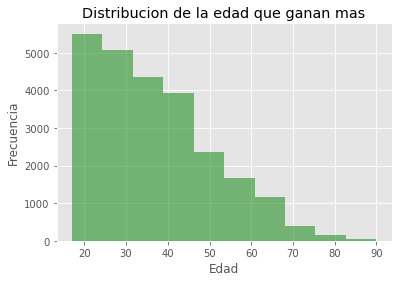

In [10]:
# Histograma que compara la edad y donde se centra las edades que ganan menos de 50K
hist_above_50=plt.hist(data[data.greater_than_50k == 0].age.values, 10, facecolor='green', alpha=0.5)
plt.title('Distribucion de la edad que ganan mas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

In [11]:
# agrupamos los valores que ganan 50K dependiendo la clase de trabajo que tienen
dist_data=pd.concat([data[data.greater_than_50k == 1].groupby('workclass').workclass.count(),data[data.greater_than_50k == 0].groupby('workclass').workclass.count()], axis=1)

#Despues de agruparlas las asignamos a columnas en el dataset
dist_data.columns=['wk_class_gt50', 'wk_class_lt50']
dist_data

wk_class_gt50  wk_class_lt50
 Federal-gov               371.0            589
 Local-gov                 617.0           1476
 Private                  4963.0          17732
 Self-emp-inc              622.0            494
 Self-emp-not-inc          724.0           1817
 State-gov                 353.0            945
 Never-worked                NaN              7
 Without-pay                 NaN             14

# Ingresos por clase de trabajo

In [12]:
# Porcentaje de ingresos por clase de trabajo
dist_data_final=dist_data.wk_class_gt50 / (dist_data.wk_class_lt50+dist_data.wk_class_gt50)

Text(0, 0.5, '% de personas')

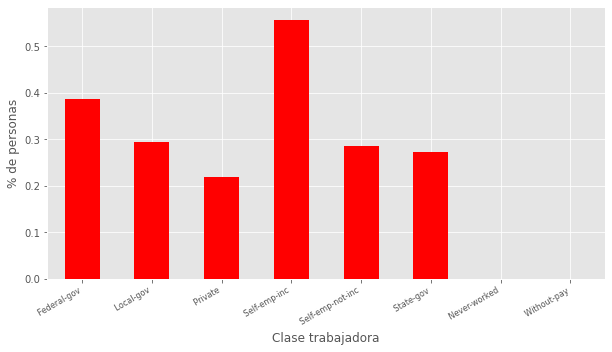

In [13]:
# Graficamos el porcentaje de ingresos por clase de trabajo
plt.figure(figsize=(10,5))
ax = dist_data_final.plot(kind='bar', color ='r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Clase trabajadora')
ax.set_ylabel('% de personas')

# Hipotesis de ganas mas el que tiene mejor educacion

Text(0, 0.5, '% de personas')

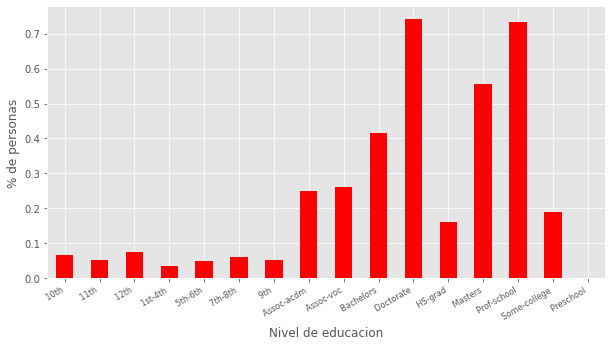

In [14]:

dist_data=pd.concat([data[data.greater_than_50k == 1].groupby('education').education.count(),data[data.greater_than_50k == 0].groupby('education').education.count()], axis=1)

dist_data.columns=['education_class_gt50', 'education_class_lt50']

dist_data_final=dist_data.education_class_gt50 / (dist_data.education_class_lt50+dist_data.education_class_gt50)

plt.figure(figsize=(10,5))
ax = dist_data_final.plot(kind='bar', color ='r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Nivel de educacion')
ax.set_ylabel('% de personas')

# Hipotesis de las personas casadas ganan mas dinero

Text(0, 0.5, '% de personas')

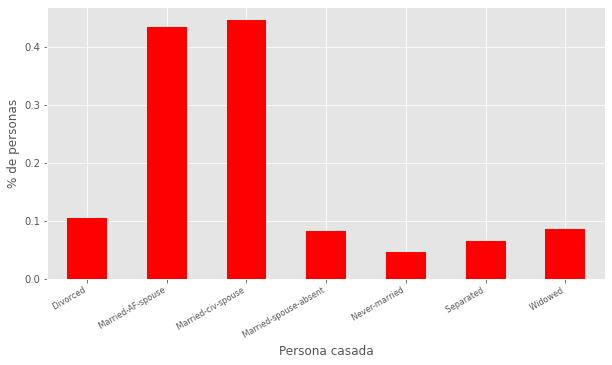

In [15]:
dist_data=pd.concat([data[data.greater_than_50k == 1].groupby('marital_status').marital_status.count(),data[data.greater_than_50k == 0].groupby('marital_status').marital_status.count()], axis=1)


dist_data.columns=['marital_status_class_gt50', 'marital_status_class_lt50']

dist_data_final=dist_data.marital_status_class_gt50 / (dist_data.marital_status_class_lt50+dist_data.marital_status_class_gt50)

plt.figure(figsize=(10,5))
ax = dist_data_final.plot(kind='bar', color ='r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Persona casada')
ax.set_ylabel('% de personas')

# Los ingresos dependen de la educacion

Text(0, 0.5, '% de personas')

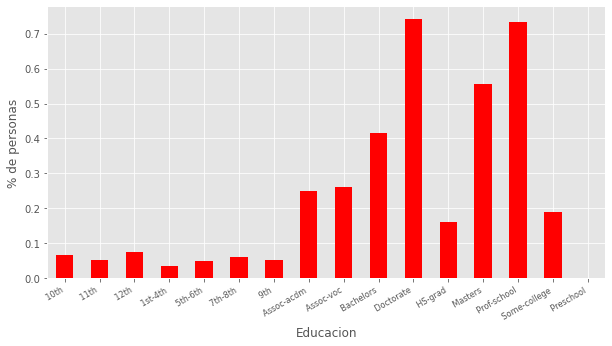

In [16]:
dist_data=pd.concat([data[data.greater_than_50k == 1].groupby('education').education.count(),data[data.greater_than_50k == 0].groupby('education').education.count()], axis=1)


dist_data.columns=['education_class_gt50', 'education_class_lt50']

dist_data_final=dist_data.education_class_gt50 / (dist_data.education_class_lt50+dist_data.education_class_gt50)

plt.figure(figsize=(10,5))
ax = dist_data_final.plot(kind='bar', color ='r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Educacion')
ax.set_ylabel('% de personas')

# Hombres ganan mas

Text(0, 0.5, '% de personas')

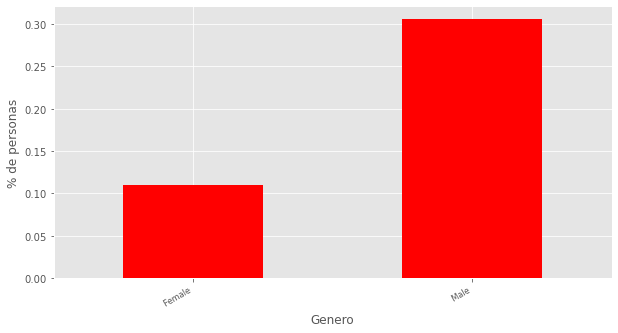

In [17]:
dist_data=pd.concat([data[data.greater_than_50k == 1].groupby('gender').gender.count(),data[data.greater_than_50k == 0].groupby('gender').gender.count()], axis=1)


dist_data.columns=['gender_class_gt50', 'gender_class_lt50']

dist_data_final=dist_data.gender_class_gt50 / (dist_data.gender_class_lt50+dist_data.gender_class_gt50)

plt.figure(figsize=(10,5))
ax = dist_data_final.plot(kind='bar', color ='r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Genero')
ax.set_ylabel('% de personas')

# Ingresos por pais

Text(0, 0.5, '% de personas')

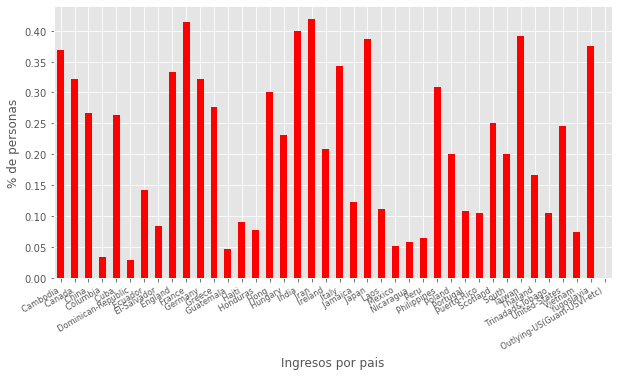

In [18]:
dist_data=pd.concat([data[data.greater_than_50k == 1].groupby('native_country').native_country.count(),data[data.greater_than_50k == 0].groupby('native_country').native_country.count()], axis=1)


dist_data.columns=['native_country_class_gt50', 'native_country_class_lt50']

dist_data_final=dist_data.native_country_class_gt50 / (dist_data.native_country_class_lt50+dist_data.native_country_class_gt50)

plt.figure(figsize=(10,5))
ax = dist_data_final.plot(kind='bar', color ='r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Ingresos por pais')
ax.set_ylabel('% de personas')

# Ingresos por raza

Text(0, 0.5, '% de personas')

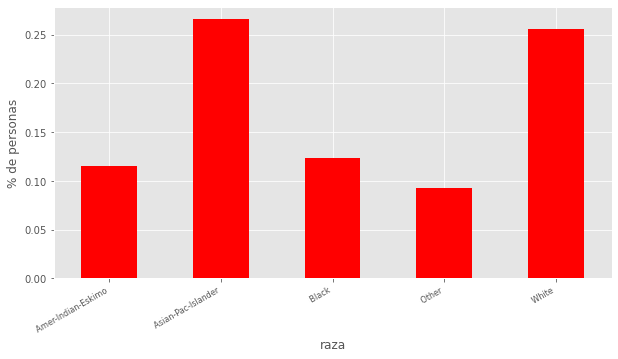

In [19]:
dist_data=pd.concat([data[data.greater_than_50k == 1].groupby('race').race.count(),data[data.greater_than_50k == 0].groupby('race').race.count()], axis=1)


dist_data.columns=['race_class_gt50', 'race_class_lt50']

dist_data_final=dist_data.race_class_gt50 / (dist_data.race_class_lt50+dist_data.race_class_gt50)

plt.figure(figsize=(10,5))
ax = dist_data_final.plot(kind='bar', color ='r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('raza')
ax.set_ylabel('% de personas')

In [20]:
data.shape

(32560, 11)

In [21]:
data.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'hours_per_week', 'native_country',
       'greater_than_50k'],
      dtype='object')

In [22]:
data.groupby("workclass").workclass.count()

workclass
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22695
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
Name: workclass, dtype: int64

In [23]:
# Reaalizamos dummies ya que valor char no se pueden sumar 
workclass_dummies=pd.get_dummies(data.workclass, prefix='Wkc_')
workclass_dummies.drop(workclass_dummies.columns[0],axis=1,inplace=True)

# creamos una variable data para asignar los valores del data principal mas el dummie que ha sido creado 
data_census=pd.concat([data,workclass_dummies], axis=1)
data_census.head()

age          workclass   education       marital_status  \
0   39          State-gov   Bachelors        Never-married   
1   50   Self-emp-not-inc   Bachelors   Married-civ-spouse   
2   38            Private     HS-grad             Divorced   
3   53            Private        11th   Married-civ-spouse   
4   28            Private   Bachelors   Married-civ-spouse   

           occupation    relationship    race   gender  hours_per_week  \
0        Adm-clerical   Not-in-family   White     Male              40   
1     Exec-managerial         Husband   White     Male              13   
2   Handlers-cleaners   Not-in-family   White     Male              40   
3   Handlers-cleaners         Husband   Black     Male              40   
4      Prof-specialty            Wife   Black   Female              40   

   native_country  greater_than_50k  Wkc__ Local-gov  Wkc__ Never-worked  \
0   United-States                 0                0                   0   
1   United-States                 0                0                   0   
2   United-States                 0                0                   0   
3   United-States                 0                0                   0   
4            Cuba                 0                0                   0   

   Wkc__ Private  Wkc__ Self-emp-inc  Wkc__ Self-emp-not-inc  Wkc__ State-gov  \
0              0                   0                       0                1   
1              0                   0                       1                0   
2              1                   0                       0                0   
3              1                   0                       0                0   
4              1                   0                       0                0   

   Wkc__ Without-pay  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [24]:
education_dummies=pd.get_dummies(data.education, prefix='educ_')
education_dummies.drop(education_dummies.columns[0],axis=1,inplace=True)
data_census1=pd.concat([data_census, education_dummies], axis=1)
data_census1.head()

age          workclass   education       marital_status  \
0   39          State-gov   Bachelors        Never-married   
1   50   Self-emp-not-inc   Bachelors   Married-civ-spouse   
2   38            Private     HS-grad             Divorced   
3   53            Private        11th   Married-civ-spouse   
4   28            Private   Bachelors   Married-civ-spouse   

           occupation    relationship    race   gender  hours_per_week  \
0        Adm-clerical   Not-in-family   White     Male              40   
1     Exec-managerial         Husband   White     Male              13   
2   Handlers-cleaners   Not-in-family   White     Male              40   
3   Handlers-cleaners         Husband   Black     Male              40   
4      Prof-specialty            Wife   Black   Female              40   

   native_country  ...  educ__ 9th  educ__ Assoc-acdm  educ__ Assoc-voc  \
0   United-States  ...           0                  0                 0   
1   United-States  ...           0                  0                 0   
2   United-States  ...           0                  0                 0   
3   United-States  ...           0                  0                 0   
4            Cuba  ...           0                  0                 0   

   educ__ Bachelors  educ__ Doctorate  educ__ HS-grad  educ__ Masters  \
0                 1                 0               0               0   
1                 1                 0               0               0   
2                 0                 0               1               0   
3                 0                 0               0               0   
4                 1                 0               0               0   

   educ__ Preschool  educ__ Prof-school  educ__ Some-college  
0                 0                   0                    0  
1                 0                   0                    0  
2                 0                   0                    0  
3                 0                   0                    0  
4                 0                   0                    0  

[5 rows x 33 columns]

In [25]:
ocupation_dummies=pd.get_dummies(data.occupation, prefix='oc_')
ocupation_dummies.drop(ocupation_dummies.columns[0],axis=1,inplace=True)
data_census2=pd.concat([data_census1,ocupation_dummies], axis=1)
data_census2.head()

age          workclass   education       marital_status  \
0   39          State-gov   Bachelors        Never-married   
1   50   Self-emp-not-inc   Bachelors   Married-civ-spouse   
2   38            Private     HS-grad             Divorced   
3   53            Private        11th   Married-civ-spouse   
4   28            Private   Bachelors   Married-civ-spouse   

           occupation    relationship    race   gender  hours_per_week  \
0        Adm-clerical   Not-in-family   White     Male              40   
1     Exec-managerial         Husband   White     Male              13   
2   Handlers-cleaners   Not-in-family   White     Male              40   
3   Handlers-cleaners         Husband   Black     Male              40   
4      Prof-specialty            Wife   Black   Female              40   

   native_country  ...  oc__ Farming-fishing  oc__ Handlers-cleaners  \
0   United-States  ...                     0                       0   
1   United-States  ...                     0                       0   
2   United-States  ...                     0                       1   
3   United-States  ...                     0                       1   
4            Cuba  ...                     0                       0   

   oc__ Machine-op-inspct  oc__ Other-service  oc__ Priv-house-serv  \
0                       0                   0                     0   
1                       0                   0                     0   
2                       0                   0                     0   
3                       0                   0                     0   
4                       0                   0                     0   

   oc__ Prof-specialty  oc__ Protective-serv  oc__ Sales  oc__ Tech-support  \
0                    0                     0           0                  0   
1                    0                     0           0                  0   
2                    0                     0           0                  0   
3                    0                     0           0                  0   
4                    1                     0           0                  0   

   oc__ Transport-moving  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 46 columns]

In [26]:
marital_status_dummies=pd.get_dummies(data.marital_status, prefix='ms_')
marital_status_dummies.drop(marital_status_dummies.columns[0],axis=1,inplace=True)
data_census3=pd.concat([data_census2,marital_status_dummies], axis=1)
data_census3.head()

age          workclass   education       marital_status  \
0   39          State-gov   Bachelors        Never-married   
1   50   Self-emp-not-inc   Bachelors   Married-civ-spouse   
2   38            Private     HS-grad             Divorced   
3   53            Private        11th   Married-civ-spouse   
4   28            Private   Bachelors   Married-civ-spouse   

           occupation    relationship    race   gender  hours_per_week  \
0        Adm-clerical   Not-in-family   White     Male              40   
1     Exec-managerial         Husband   White     Male              13   
2   Handlers-cleaners   Not-in-family   White     Male              40   
3   Handlers-cleaners         Husband   Black     Male              40   
4      Prof-specialty            Wife   Black   Female              40   

   native_country  ...  oc__ Protective-serv  oc__ Sales  oc__ Tech-support  \
0   United-States  ...                     0           0                  0   
1   United-States  ...                     0           0                  0   
2   United-States  ...                     0           0                  0   
3   United-States  ...                     0           0                  0   
4            Cuba  ...                     0           0                  0   

   oc__ Transport-moving  ms__ Married-AF-spouse  ms__ Married-civ-spouse  \
0                      0                       0                        0   
1                      0                       0                        1   
2                      0                       0                        0   
3                      0                       0                        1   
4                      0                       0                        1   

   ms__ Married-spouse-absent  ms__ Never-married  ms__ Separated  \
0                           0                   1               0   
1                           0                   0               0   
2                           0                   0               0   
3                           0                   0               0   
4                           0                   0               0   

   ms__ Widowed  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 52 columns]

In [27]:
race_dummies=pd.get_dummies(data.race, prefix='race_')
race_dummies.drop(race_dummies.columns[0],axis=1,inplace=True)
data_census4=pd.concat([data_census3,race_dummies], axis=1)
data_census4.head()

age          workclass   education       marital_status  \
0   39          State-gov   Bachelors        Never-married   
1   50   Self-emp-not-inc   Bachelors   Married-civ-spouse   
2   38            Private     HS-grad             Divorced   
3   53            Private        11th   Married-civ-spouse   
4   28            Private   Bachelors   Married-civ-spouse   

           occupation    relationship    race   gender  hours_per_week  \
0        Adm-clerical   Not-in-family   White     Male              40   
1     Exec-managerial         Husband   White     Male              13   
2   Handlers-cleaners   Not-in-family   White     Male              40   
3   Handlers-cleaners         Husband   Black     Male              40   
4      Prof-specialty            Wife   Black   Female              40   

   native_country  ...  ms__ Married-AF-spouse  ms__ Married-civ-spouse  \
0   United-States  ...                       0                        0   
1   United-States  ...                       0                        1   
2   United-States  ...                       0                        0   
3   United-States  ...                       0                        1   
4            Cuba  ...                       0                        1   

   ms__ Married-spouse-absent  ms__ Never-married  ms__ Separated  \
0                           0                   1               0   
1                           0                   0               0   
2                           0                   0               0   
3                           0                   0               0   
4                           0                   0               0   

   ms__ Widowed  race__ Asian-Pac-Islander  race__ Black  race__ Other  \
0             0                          0             0             0   
1             0                          0             0             0   
2             0                          0             0             0   
3             0                          0             1             0   
4             0                          0             1             0   

   race__ White  
0             1  
1             1  
2             1  
3             0  
4             0  

[5 rows x 56 columns]

In [28]:
gender_dummies=pd.get_dummies(data.gender, prefix='gender_')
gender_dummies.drop(gender_dummies.columns[0],axis=1,inplace=True)
data_census5=pd.concat([data_census4,gender_dummies], axis=1)
data_census5.head()

age          workclass   education       marital_status  \
0   39          State-gov   Bachelors        Never-married   
1   50   Self-emp-not-inc   Bachelors   Married-civ-spouse   
2   38            Private     HS-grad             Divorced   
3   53            Private        11th   Married-civ-spouse   
4   28            Private   Bachelors   Married-civ-spouse   

           occupation    relationship    race   gender  hours_per_week  \
0        Adm-clerical   Not-in-family   White     Male              40   
1     Exec-managerial         Husband   White     Male              13   
2   Handlers-cleaners   Not-in-family   White     Male              40   
3   Handlers-cleaners         Husband   Black     Male              40   
4      Prof-specialty            Wife   Black   Female              40   

   native_country  ...  ms__ Married-civ-spouse  ms__ Married-spouse-absent  \
0   United-States  ...                        0                           0   
1   United-States  ...                        1                           0   
2   United-States  ...                        0                           0   
3   United-States  ...                        1                           0   
4            Cuba  ...                        1                           0   

   ms__ Never-married  ms__ Separated  ms__ Widowed  \
0                   1               0             0   
1                   0               0             0   
2                   0               0             0   
3                   0               0             0   
4                   0               0             0   

   race__ Asian-Pac-Islander  race__ Black  race__ Other  race__ White  \
0                          0             0             0             1   
1                          0             0             0             1   
2                          0             0             0             1   
3                          0             1             0             0   
4                          0             1             0             0   

   gender__ Male  
0              1  
1              1  
2              1  
3              1  
4              0  

[5 rows x 57 columns]

In [29]:
native_country_dummies=pd.get_dummies(data.native_country, prefix='nc_')
native_country_dummies.drop(native_country_dummies.columns[0],axis=1,inplace=True)
data_census6=pd.concat([data_census5,native_country_dummies], axis=1)
data_census6.head()

age          workclass   education       marital_status  \
0   39          State-gov   Bachelors        Never-married   
1   50   Self-emp-not-inc   Bachelors   Married-civ-spouse   
2   38            Private     HS-grad             Divorced   
3   53            Private        11th   Married-civ-spouse   
4   28            Private   Bachelors   Married-civ-spouse   

           occupation    relationship    race   gender  hours_per_week  \
0        Adm-clerical   Not-in-family   White     Male              40   
1     Exec-managerial         Husband   White     Male              13   
2   Handlers-cleaners   Not-in-family   White     Male              40   
3   Handlers-cleaners         Husband   Black     Male              40   
4      Prof-specialty            Wife   Black   Female              40   

   native_country  ...  nc__ Portugal  nc__ Puerto-Rico  nc__ Scotland  \
0   United-States  ...              0                 0              0   
1   United-States  ...              0                 0              0   
2   United-States  ...              0                 0              0   
3   United-States  ...              0                 0              0   
4            Cuba  ...              0                 0              0   

   nc__ South  nc__ Taiwan  nc__ Thailand  nc__ Trinadad&Tobago  \
0           0            0              0                     0   
1           0            0              0                     0   
2           0            0              0                     0   
3           0            0              0                     0   
4           0            0              0                     0   

   nc__ United-States  nc__ Vietnam  nc__ Yugoslavia  
0                   1             0                0  
1                   1             0                0  
2                   1             0                0  
3                   1             0                0  
4                   0             0                0  

[5 rows x 96 columns]

In [30]:
rs_dummies=pd.get_dummies(data.relationship, prefix='rs_')
rs_dummies.drop(rs_dummies.columns[0],axis=1,inplace=True)
data_census7=pd.concat([data_census6,rs_dummies], axis=1)
data_census7.head()

age          workclass   education       marital_status  \
0   39          State-gov   Bachelors        Never-married   
1   50   Self-emp-not-inc   Bachelors   Married-civ-spouse   
2   38            Private     HS-grad             Divorced   
3   53            Private        11th   Married-civ-spouse   
4   28            Private   Bachelors   Married-civ-spouse   

           occupation    relationship    race   gender  hours_per_week  \
0        Adm-clerical   Not-in-family   White     Male              40   
1     Exec-managerial         Husband   White     Male              13   
2   Handlers-cleaners   Not-in-family   White     Male              40   
3   Handlers-cleaners         Husband   Black     Male              40   
4      Prof-specialty            Wife   Black   Female              40   

   native_country  ...  nc__ Thailand  nc__ Trinadad&Tobago  \
0   United-States  ...              0                     0   
1   United-States  ...              0                     0   
2   United-States  ...              0                     0   
3   United-States  ...              0                     0   
4            Cuba  ...              0                     0   

   nc__ United-States  nc__ Vietnam  nc__ Yugoslavia  rs__ Not-in-family  \
0                   1             0                0                   1   
1                   1             0                0                   0   
2                   1             0                0                   1   
3                   1             0                0                   0   
4                   0             0                0                   0   

   rs__ Other-relative  rs__ Own-child  rs__ Unmarried  rs__ Wife  
0                    0               0               0          0  
1                    0               0               0          0  
2                    0               0               0          0  
3                    0               0               0          0  
4                    0               0               0          1  

[5 rows x 101 columns]

In [31]:
data_census8=pd.concat([data_census7, rs_dummies], axis=1)
data_census7.head()

age          workclass   education       marital_status  \
0   39          State-gov   Bachelors        Never-married   
1   50   Self-emp-not-inc   Bachelors   Married-civ-spouse   
2   38            Private     HS-grad             Divorced   
3   53            Private        11th   Married-civ-spouse   
4   28            Private   Bachelors   Married-civ-spouse   

           occupation    relationship    race   gender  hours_per_week  \
0        Adm-clerical   Not-in-family   White     Male              40   
1     Exec-managerial         Husband   White     Male              13   
2   Handlers-cleaners   Not-in-family   White     Male              40   
3   Handlers-cleaners         Husband   Black     Male              40   
4      Prof-specialty            Wife   Black   Female              40   

   native_country  ...  nc__ Thailand  nc__ Trinadad&Tobago  \
0   United-States  ...              0                     0   
1   United-States  ...              0                     0   
2   United-States  ...              0                     0   
3   United-States  ...              0                     0   
4            Cuba  ...              0                     0   

   nc__ United-States  nc__ Vietnam  nc__ Yugoslavia  rs__ Not-in-family  \
0                   1             0                0                   1   
1                   1             0                0                   0   
2                   1             0                0                   1   
3                   1             0                0                   0   
4                   0             0                0                   0   

   rs__ Other-relative  rs__ Own-child  rs__ Unmarried  rs__ Wife  
0                    0               0               0          0  
1                    0               0               0          0  
2                    0               0               0          0  
3                    0               0               0          0  
4                    0               0               0          1  

[5 rows x 101 columns]

In [32]:
# Las caracteristicas mas importantes que hemos obtenido mediante los dummies
features = ['age','hours_per_week',
       'Wkc__ Local-gov', 'Wkc__ Never-worked', 'Wkc__ Private',
       'Wkc__ Self-emp-inc', 'Wkc__ Self-emp-not-inc', 'Wkc__ State-gov',
       'Wkc__ Without-pay', 'educ__ 11th', 'educ__ 12th', 'educ__ 1st-4th',
       'educ__ 5th-6th', 'educ__ 7th-8th', 'educ__ 9th', 'educ__ Assoc-acdm',
       'educ__ Assoc-voc', 'educ__ Bachelors', 'educ__ Doctorate',
       'educ__ HS-grad', 'educ__ Masters', 'educ__ Preschool',
       'educ__ Prof-school', 'educ__ Some-college', 'ms__ Married-AF-spouse',
       'ms__ Married-civ-spouse', 'ms__ Married-spouse-absent',
       'ms__ Never-married', 'ms__ Separated', 'ms__ Widowed',
       'oc__ Armed-Forces', 'oc__ Craft-repair', 'oc__ Exec-managerial',
       'oc__ Farming-fishing', 'oc__ Handlers-cleaners',
       'oc__ Machine-op-inspct', 'oc__ Other-service', 'oc__ Priv-house-serv',
       'oc__ Prof-specialty', 'oc__ Protective-serv', 'oc__ Sales',
       'oc__ Tech-support', 'oc__ Transport-moving', 'rs__ Not-in-family',
       'rs__ Other-relative', 'rs__ Own-child', 'rs__ Unmarried', 'rs__ Wife',
       'race__ Asian-Pac-Islander', 'race__ Black', 'race__ Other',
       'race__ White', 'gender__ Male', 'nc__ Canada', 'nc__ China',
       'nc__ Columbia', 'nc__ Cuba', 'nc__ Dominican-Republic', 'nc__ Ecuador',
       'nc__ El-Salvador', 'nc__ England', 'nc__ France', 'nc__ Germany',
       'nc__ Greece', 'nc__ Guatemala', 'nc__ Haiti', 'nc__ Honduras',
       'nc__ Hong', 'nc__ Hungary', 'nc__ India', 'nc__ Iran', 'nc__ Ireland',
       'nc__ Italy', 'nc__ Jamaica', 'nc__ Japan', 'nc__ Laos', 'nc__ Mexico',
       'nc__ Nicaragua', 'nc__ Outlying-US(Guam-USVI-etc)', 'nc__ Peru',
       'nc__ Philippines', 'nc__ Poland', 'nc__ Portugal', 'nc__ Puerto-Rico',
       'nc__ Scotland', 'nc__ South', 'nc__ Taiwan', 'nc__ Thailand',
       'nc__ Trinadad&Tobago', 'nc__ United-States', 'nc__ Vietnam',
       'nc__ Yugoslavia']

In [33]:
# Asignamos los valores feautures a X
X= data_census7[features].values

In [34]:
# Asignamos lo valores a y de la columna greather_than_50k
y=data_census8['greater_than_50k'].values

In [35]:
#Cramos lass muestras entrenamiento y preuba con 30% para prueba y 70% para entrenamiento
X_entrenamiento,X_prueba,y_entrenamiento,y_prueba=train_test_split(X,y, test_size=0.3, random_state=100)

In [36]:
#Inicializamos el algoritmo con una profundiad de 3 
clf=DecisionTreeClassifier(criterion="gini", random_state=100,max_depth=3,min_samples_leaf=5)

In [37]:
#Construimos el modelo sobre los datos de entrenamiento
clf.fit(X_entrenamiento,y_entrenamiento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [38]:
# Las caracteristicas mass importantes
clf.feature_importances_

array([0.02418128, 0.04802307, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.10786365, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.71714959, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.10278242, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [43]:
# asignamos a la variables las caracteristicas mas importantes de la columna features
importancia=pd.DataFrame({"features":features,"importance":clf.feature_importances_})

In [44]:
# Caracteristica mas importante 
importancia.sort_values("importance",ascending=False).head()

features  importance
25  ms__ Married-civ-spouse    0.717150
17         educ__ Bachelors    0.107864
38      oc__ Prof-specialty    0.102782
1            hours_per_week    0.048023
0                       age    0.024181

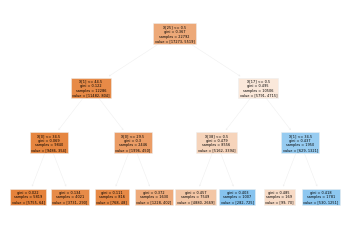

In [39]:
# Visualizamos el arbol obtenido mediante la clasificacion
plt.figure()
plot_tree(clf,filled=True)
plt.show()

In [40]:
# Realizamos la prediccion de las pruebas
y_predic=clf.predict(X_prueba)

In [41]:
# Matriz de confusion
pd.crosstab(y_prueba, y_predic, rownames=['Real'],colnames=['Prediccion'])

Prediccion     0    1
Real                 
0           7100  346
1           1500  822

In [42]:
print(classification_report(y_prueba,y_predic))

precision    recall  f1-score   support

           0       0.83      0.95      0.88      7446
           1       0.70      0.35      0.47      2322

    accuracy                           0.81      9768
   macro avg       0.76      0.65      0.68      9768
weighted avg       0.80      0.81      0.79      9768



In [45]:
# Presicion del modelo mediante la clasificacion
print("La Precision del modelo mediante la clasificacion es:",clf.score(X_entrenamiento,y_entrenamiento))

La Precision del modelo mediante la clasificacion es: 0.808924183924184


In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
# Inicializamos el arbol de decision
regressor1=DecisionTreeRegressor(random_state=0,max_depth=10)

In [50]:
# Construimos el modelo
regressor1.fit(X_entrenamiento,y_entrenamiento)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [51]:
# Realizamos la prediccion
y_1=regressor1.predict(X_prueba)

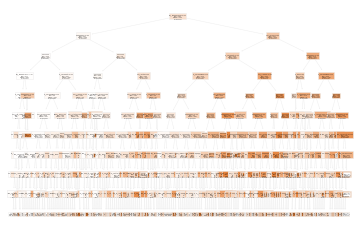

In [52]:
# Visualizamos el arbol que hemos obtenido
plt.figure()
plot_tree(regressor1, feature_names=features,filled=True)
plt.show()

In [53]:
# Precision del modelo mediante la regresion
print("La presicion obtenida del modelo es:",regressor1.score(X_entrenamiento,y_entrenamiento))

La presicion obtenida del modelo es: 0.44919049489914253
